# Imports

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Get Data

In [2]:
train_data = pd.read_csv("1644871288_9762487_cleveland-train.csv")

x = train_data.iloc[:,:-1].values #extracting all features to x
y = train_data.iloc[:,-1].values #extracting all output labels(-1,+1) to y
y[y==-1]=0

print("number of training examples in dataset: ",x.shape[0])
print("number of features in dataset: ",x.shape[1])

number of training examples in dataset:  152
number of features in dataset:  13


# Add Feature for weight0

In [3]:
z = np.ones(x.shape[0])
z = z.reshape(x.shape[0],1)

x = np.append(z,x,axis=1)
x[0:5]

array([[  1. ,  67. ,   1. ,   4. , 120. , 229. ,   0. ,   2. , 129. ,
          1. ,   2.6,   2. ,   2. ,   7. ],
       [  1. ,  37. ,   1. ,   3. , 130. , 250. ,   0. ,   0. , 187. ,
          0. ,   3.5,   3. ,   0. ,   3. ],
       [  1. ,  56. ,   1. ,   2. , 120. , 236. ,   0. ,   0. , 178. ,
          0. ,   0.8,   1. ,   0. ,   3. ],
       [  1. ,  57. ,   0. ,   4. , 120. , 354. ,   0. ,   0. , 163. ,
          1. ,   0.6,   1. ,   0. ,   3. ],
       [  1. ,  63. ,   1. ,   4. , 130. , 254. ,   0. ,   2. , 147. ,
          0. ,   1.4,   2. ,   1. ,   7. ]])

# Functions

In [4]:
def hypothesis(x,w): # Hypothesis function for Logistic Regression
    Z = np.matmul(x,w)
    return (1.0 / (1 + np.exp(-Z)))

def get_cost(y, y_hat): # Cross-entropy error or Cost Function
    return - np.sum(np.dot(y.T,np.log(y_hat + 1e-10)) + np.dot((1 - y).T,np.log(1 - y_hat + 1e-10))) / (len(y))

def update_weight(w , y , y_hat, x, alpha): # updating weights at every step
    dw = np.dot((y_hat - y), x) / len(y)
    w_new = w - alpha * dw
    return w_new, dw

def predict(x,w):    #predicting class +1 or -1 based on hypothesis probability
    y_predicted = hypothesis(x,w)
    y_predicted_cls = [1 if i>=0.5 else -1 for i in y_predicted]
    return y_predicted_cls

# Gradient Descent

In [5]:
%%time
num_iterations = 10000 #check with 10k,100k & 1M iterations
alpha = 10e-5

all_costs = []
w = np.ones(x.shape[1]) #initializing all weights to 1's
print("initial guess of weights: ", w)

for each_iter in range (num_iterations):
    y_hat = hypothesis(x,w)
    current_cost = get_cost(y, y_hat)
    prev_w = w
    w, dw = update_weight(prev_w, y, y_hat, x, alpha)
    if all(dw < 10e-3): #terminate when gradient<10e-3
        i_exit = each_iter
        break
    all_costs.append(current_cost)
    #print('Iteration: ', each_iter, 'Cost: ', current_cost) #un-comment this line to print values for each iteration
    
print("Final estimates of weights are: ",w)
print("Cost when loop ends: ",current_cost)

initial guess of weights:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Final estimates of weights are:  [ 0.98226563 -0.11446842  0.97355664  0.91720768  0.00145873 -0.00252495
  0.98258467  0.98151409 -0.0429977   0.98866838  0.92837913  0.94853683
  0.98220696  0.80918581]
Cost when loop ends:  0.6098175136729922
Wall time: 1.07 s


# Plotting to check for convergence

Text(0.5, 1.0, 'Iterations vs Cost Function')

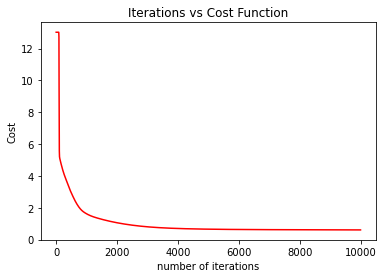

In [6]:
loop = range(0,num_iterations)    #use i_exit when iterations=1M
plt.plot(loop,all_costs,'r-')
plt.xlabel('number of iterations')
plt.ylabel('Cost')
plt.title('Iterations vs Cost Function')

# Predicting Class for Train Data

In [7]:
predicted_cls = predict(x,w)
print(predicted_cls)

[1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1]


# Checking Accuracy and Classification error on Train Data

In [8]:
temp_data = pd.read_csv("1644871288_9762487_cleveland-train.csv")
Y_true = temp_data.iloc[:,-1].values #extracting all output labels(-1,+1) to y

acc = accuracy_score(Y_true, predicted_cls)
print("---Training Data---")
print("Accuracy = ",acc,"\nTraining or Classification error = ",1-acc)

---Training Data---
Accuracy =  0.7894736842105263 
Training or Classification error =  0.21052631578947367


# Logistic Regression using Sklearn

In [9]:
%%time
lreg = LogisticRegression(solver='lbfgs', max_iter=10000)
lmodel = lreg.fit(x, Y_true)

print("Accuracy by sklearn : ",accuracy_score(Y_true,lreg.predict(x)))

Accuracy by sklearn :  0.8223684210526315
Wall time: 419 ms


# Predicting class for Test Data

In [10]:
test_data = pd.read_csv("1644871288_9775174_cleveland-test.csv")
X_test = test_data.iloc[:,:].values

zt = np.ones(X_test.shape[0])
zt = zt.reshape(X_test.shape[0],1)
X_test = np.append(zt,X_test,axis=1)

test_predicted = predict(X_test,w)

file = open("GD.dat","w", encoding='utf-8')
for i in test_predicted:
    file.write(str(i)+'\n')

# Scaling features in Training Data

In [11]:
train_data_S = pd.read_csv("1644871288_9762487_cleveland-train.csv")

X = train_data_S.iloc[:,:-1].values #extracting all features to x
Y = train_data_S.iloc[:,-1].values #extracting all output labels(-1,+1) to y
Y[Y==-1]=0

Z = np.ones(X.shape[0])
Z = Z.reshape(X.shape[0],1)
X = np.append(Z,X,axis=1)

scalar = StandardScaler()
X_Scale = scalar.fit_transform(X)

X_Scale[0]

array([ 0.        ,  1.3984336 ,  0.72111026,  0.90330002, -0.59276951,
       -0.36833381, -0.38924947,  1.0931468 , -0.87672194,  1.64539268,
        1.47329663,  0.69963115,  1.49009161,  1.13265251])

# Gradient Descent After Scaling

In [12]:
%%time
num_iter = 1000000
lr = 10e-3    #check with 10e-3,10e-4,10e-5

all_costs_S = []
w_Scale = np.ones(X_Scale.shape[1])
print("initial guess of weights: ", w_Scale)

for iter in range (num_iter):
    y_hat_S = hypothesis(X_Scale,w_Scale)
    current_cost_S = get_cost(Y, y_hat_S)
    prev_w_S = w_Scale
    w_Scale, dw_S = update_weight(prev_w_S, Y, y_hat_S, X_Scale, lr)
    if all(dw_S < 10e-6):
        i_no = iter
        break
    all_costs_S.append(current_cost_S)
    #print('Iteration: ', iter, 'Cost: ', current_cost_S)
    
print("Final estimates of weights are: ",w_Scale)
print("Number of iterations: ",i_no+1,"\nFinal Cost when loop ends: ",current_cost_S)

initial guess of weights:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Final estimates of weights are:  [ 1.         -0.22296576  0.41021805  0.50400684  0.46435642  0.11475695
 -0.34602908  0.32190158 -0.34830171  0.32095515  0.19898775  0.22845957
  1.02018847  0.50669513]
Number of iterations:  16331 
Final Cost when loop ends:  0.4147157717642218
Wall time: 1.68 s


# Plotting to check for convergence

Text(0.5, 1.0, 'Iterations vs Cost Function')

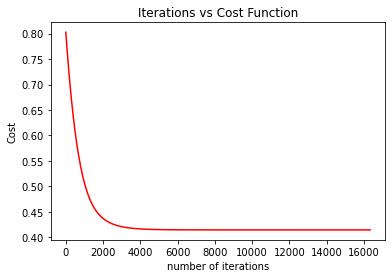

In [13]:
loop1 = range(0,i_no)
plt.plot(loop1,all_costs_S,'r-')
plt.xlabel('number of iterations')
plt.ylabel('Cost')
plt.title('Iterations vs Cost Function')

# Accuracy & Error after Scaling

In [14]:
predicted_cls_S = predict(X_Scale,w_Scale)

temp_data1 = pd.read_csv("1644871288_9762487_cleveland-train.csv")
Y_Scale = temp_data1.iloc[:,-1].values 

acc_S = accuracy_score(Y_Scale, predicted_cls_S)
print("---After Scaling---")
print("Accuracy = ",acc_S,"\nTraining or Classification error = ",1-acc_S)

---After Scaling---
Accuracy =  0.8157894736842105 
Training or Classification error =  0.1842105263157895
